<h1 style="color: green;">Considerations for time series</h1>
<p>
Data leakage is the introduction of information about the target of a data mining problem,<br>
which should not be legitimately available to mine from.<br>


Data leakage is the creation of unexpected additional information in the training data<br>
allowing a model or machine learning algorithm to make unrealistically good predictions.<br>


Data leakage is the unintentional introduction of predictive information about the target<br>
by the data collection, aggregation and preparation process.<br>

In processing data for the classifier model, the data has not been split to account for<br>
the data timestamp i.e. the data is randomly sampled so there is relatively future data<br>
points in training and testing datasets. This is called data leakage. However since<br>
time series has suspicious performance, it is waved:<br><br>
<strong>
Michael Burry did not have a time series/forcasting model that predicted an imenent<br>
stock market crash in 2008. Instead, Michael stumbled onto data which indicated<br>
a serious problem in the subprime lending, the rest is common sense.</strong><br><br>
<strong>
Back in 2006-2007 no financial forcasting models successfully predicted the crash in 2008:<br> 
they didn't have the data that indicated a serious problem in the underlying assets, subprime lending.</strong><br><br>
<strong>
Forecasting models do well when there is data supporting the trend:<br>
you can see a wave building by the sea side and follow it until it collapses but you can't<br>
predict where and when it will collapse with certainty. Nore where and when the next one will arise<br>
with certainty unless you have multiple detectors beneath the waters.</strong><br><br>
<strong>
But you know in advance that one will arise, eventually.</strong><br><br>
<strong>
So the question, is time series real data science?</strong><br>

</p>

<h1 style="color: green;">Summary</h1>
<p>
In this section the following are accomplished:
<ul>
<li>Creating dummy variables with pd.get_dummies</li>
<li>Split the data into training and testing</li>
<li>Scale the values using StandardScaler</li>
<li>Feature selection removing low variance features</li>
<li>Feature selection removing correlated features</li>
<li>Export data for modelling</li>
</ul>
All of this is done with the raw data extracted in <b>Data Extraction</b>
</p>


<h1 style ="color:green;">Import libraries</h1>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# for feature selection
from feature_engine.selection import DropConstantFeatures
from feature_engine.selection import SelectByInformationValue
from sklearn.feature_selection import mutual_info_regression

# for train test split
from sklearn.model_selection import train_test_split

# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler

# joblib for storing models
import joblib

import warnings
warnings.filterwarnings('ignore')

<h1 style="color: green">Import the data</h1>

In [38]:
raw0 = pd.read_csv("../2. Data/homeshopping.csv")
raw0.head()

,Total_Nbr_of_Items,Total_Price,Venue,Payment_Type,Card_Source,Date_diff,Week_day_name,Nbr_trips_per_wk,Nbr_items_per_wk,Nbr_items_wk_perc,...,Clothes_and_shoes_wk_perc,Clothes_and_shoes_exp_receipt,Clothes_and_shoes_exp_wk,Clothes_and_shoes_wk_exp_perc,House_and_kitchen_receipt,House_and_kitchen_wk,House_and_kitchen_wk_perc,House_and_kitchen_exp_receipt,House_and_kitchen_exp_wk,House_and_kitchen_wk_exp_perc
0,1,3.29,eBay,Card,DD,0.0,Friday,3,3,0.333333,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
1,1,10.89,eBay,Card,DD,0.0,Friday,3,3,0.333333,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
2,1,2.98,eBay,Card,DD,0.0,Friday,3,3,0.333333,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
3,1,10.00,Abbey Sports,Card,DB,5.0,Wednesday,4,4,0.250000,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0
4,1,5.91,eBay,Card,DD,1.0,Thursday,4,4,0.250000,...,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0


In [3]:
# Checking the correlation between AVG_exp_item_per_wk and Expenditure_per_wk
raw0[['AVG_exp_item_per_wk','Expenditure_per_wk']].corr()

,AVG_exp_item_per_wk,Expenditure_per_wk
AVG_exp_item_per_wk,1.000000,0.658504
Expenditure_per_wk,0.658504,1.000000


<p><b>
As stated in the EDA AVG_exp_item_per_wk has a suspiciously strong correlation with Expenditure_per_wk the target.<br>It is practically the mean of Expenditure_per_wk at item level. It is best to drop it from the modelling data.
</b></p>

In [4]:
# Drop the classifier target and AVG_exp_item_per_wk as this
raw0.drop(['Trips_response_lt_5','AVG_exp_item_per_wk'], axis=1, inplace=True)

<h1 style="color: green">Creating dummy variables with pd.get_dummies()</h1>

In [5]:
# Retrieve categorical features for verification later
cat_feats = [var for var in raw0.columns if raw0[var].dtype == 'O']
cat_feats

['Venue', 'Payment_Type', 'Card_Source', 'Week_day_name', 'Part_of_day']

In [6]:
raw0.shape

(936, 154)

In [7]:
raw1 = pd.get_dummies(raw0)
raw1.head()

,Total_Nbr_of_Items,Total_Price,Date_diff,Nbr_trips_per_wk,Nbr_items_per_wk,Nbr_items_wk_perc,Expenditure_per_wk,Total_Exp_wk_perc,hour,Bread,...,Week_day_name_Saturday,Week_day_name_Sunday,Week_day_name_Thursday,Week_day_name_Tuesday,Week_day_name_Wednesday,Part_of_day_Afternoon,Part_of_day_Early,Part_of_day_Evening,Part_of_day_Late_night,Part_of_day_Morning
0,1,3.29,0.0,3,3,0.333333,17.16,0.191725,13,0,...,0,0,0,0,0,1,0,0,0,0
1,1,10.89,0.0,3,3,0.333333,17.16,0.634615,11,0,...,0,0,0,0,0,0,0,0,0,1
2,1,2.98,0.0,3,3,0.333333,17.16,0.173660,13,0,...,0,0,0,0,0,1,0,0,0,0
3,1,10.00,5.0,4,4,0.250000,28.69,0.348554,8,0,...,0,0,0,0,1,0,0,0,0,1
4,1,5.91,1.0,4,4,0.250000,28.69,0.205995,12,0,...,0,0,1,0,0,1,0,0,0,0


In [8]:
#  Note, not dropping one dummy as it is expected that some dummies will be dropped 
# in the preliminary feature selection, after which checks will be done for completeness

dummies = [var for var in raw1.columns if var not in raw0.columns]
dummies

['Venue_Abbey Sports',
 'Venue_Afro supermarket',
 'Venue_Aldi',
 'Venue_Amazon',
 'Venue_Angies Fish Bar',
 'Venue_Apple',
 'Venue_Asda',
 'Venue_B&M',
 'Venue_B&Q',
 'Venue_BP',
 'Venue_Batter days chippy',
 'Venue_Bazaar food store',
 'Venue_Bel foundry',
 'Venue_Blackbird pharmacy',
 'Venue_Bounce mania',
 'Venue_CO-OP',
 'Venue_Clintons cards',
 'Venue_Currys PC World',
 "Venue_Domino's Pizza",
 'Venue_East midlands railway',
 'Venue_EuroGarages',
 'Venue_Europe',
 'Venue_Gregs',
 'Venue_Grill shack',
 'Venue_Jasup superstore',
 'Venue_John Lewis',
 'Venue_KFC',
 'Venue_Laptops with linux',
 'Venue_Laundrette',
 'Venue_Leicester city fc',
 'Venue_Leicester libraries',
 'Venue_Lidl',
 'Venue_LinkedIn',
 'Venue_Londis',
 'Venue_Loughborough Dynamo',
 'Venue_Loughborough Greenfields',
 'Venue_M and J Congo Shop',
 'Venue_Maryland',
 'Venue_Millets',
 'Venue_Mustafa halal',
 'Venue_Namecheap',
 'Venue_National express',
 'Venue_National space centre',
 'Venue_O2 Academy',
 'Venue_Petr

<h1 style="color: green">Renaming Expenditure_per_wk to target</h1>

In [9]:
raw1.rename(columns={'Expenditure_per_wk':'target'}, inplace=True)

<h1 style="color: green">Train test split</h1>

In [10]:
X_train,X_test, y_train, y_test =\
train_test_split(raw1.drop(['target'], axis=1),
                 raw1.target, 
                 test_size=0.30, 
                 random_state=44)

In [11]:
X_train.head()

,Total_Nbr_of_Items,Total_Price,Date_diff,Nbr_trips_per_wk,Nbr_items_per_wk,Nbr_items_wk_perc,Total_Exp_wk_perc,hour,Bread,Cooked_meats,...,Week_day_name_Saturday,Week_day_name_Sunday,Week_day_name_Thursday,Week_day_name_Tuesday,Week_day_name_Wednesday,Part_of_day_Afternoon,Part_of_day_Early,Part_of_day_Evening,Part_of_day_Late_night,Part_of_day_Morning
82,6,4.82,3.0,5,29,0.206897,0.110373,8,1,0,...,0,0,0,1,0,0,0,0,0,1
390,1,1.09,0.0,17,46,0.021739,0.006595,15,0,0,...,0,1,0,0,0,1,0,0,0,0
185,12,9.35,4.0,2,15,0.800000,0.272277,12,1,1,...,0,0,0,0,1,1,0,0,0,0
157,3,1.65,1.0,8,43,0.069767,0.006163,15,0,0,...,0,1,0,0,0,1,0,0,0,0
716,4,7.16,0.0,4,36,0.111111,0.101159,16,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
X_test.head()

,Total_Nbr_of_Items,Total_Price,Date_diff,Nbr_trips_per_wk,Nbr_items_per_wk,Nbr_items_wk_perc,Total_Exp_wk_perc,hour,Bread,Cooked_meats,...,Week_day_name_Saturday,Week_day_name_Sunday,Week_day_name_Thursday,Week_day_name_Tuesday,Week_day_name_Wednesday,Part_of_day_Afternoon,Part_of_day_Early,Part_of_day_Evening,Part_of_day_Late_night,Part_of_day_Morning
773,12,11.37,0.0,4,16,0.750000,0.185875,11,0,1,...,0,0,0,0,0,0,0,0,0,1
742,1,14.98,0.0,5,28,0.035714,0.161614,10,0,0,...,1,0,0,0,0,0,0,0,0,1
90,5,10.47,1.0,5,21,0.238095,0.335255,18,0,0,...,0,0,0,0,0,0,0,1,0,0
632,12,14.68,2.0,6,28,0.428571,0.168852,17,0,0,...,1,0,0,0,0,1,0,0,0,0
418,1,0.55,0.0,11,33,0.030303,0.007804,15,0,0,...,0,0,1,0,0,1,0,0,0,0


<h1 style="color: green">Scaling X_train and X_test</h1>

In [13]:
X_scaler = StandardScaler().set_output(transform="pandas")
X_scaler.fit(X_train)

StandardScaler()

In [14]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
X_train_scaled.head()

,Total_Nbr_of_Items,Total_Price,Date_diff,Nbr_trips_per_wk,Nbr_items_per_wk,Nbr_items_wk_perc,Total_Exp_wk_perc,hour,Bread,Cooked_meats,...,Week_day_name_Saturday,Week_day_name_Sunday,Week_day_name_Thursday,Week_day_name_Tuesday,Week_day_name_Wednesday,Part_of_day_Afternoon,Part_of_day_Early,Part_of_day_Evening,Part_of_day_Late_night,Part_of_day_Morning
82,0.086329,-0.236649,0.487672,-0.520909,-0.295981,0.056179,-0.410729,-1.324821,1.502816,-0.372805,...,-0.483241,-0.326219,-0.393958,2.680951,-0.426978,-0.974374,-0.177471,-0.393958,-0.158238,1.445553
390,-0.816953,-0.320357,-0.516810,2.902459,0.983922,-0.829325,-0.972653,0.450253,-0.530953,-0.372805,...,-0.483241,3.065424,-0.393958,-0.373002,-0.426978,1.026300,-0.177471,-0.393958,-0.158238,-0.691777
185,1.170267,-0.134987,0.822500,-1.376752,-1.350020,2.892660,0.465925,-0.310493,1.502816,0.961553,...,-0.483241,-0.326219,-0.393958,-0.373002,2.342039,1.026300,-0.177471,-0.393958,-0.158238,-0.691777
157,-0.455640,-0.307790,-0.181982,0.334933,0.758057,-0.599633,-0.974993,0.450253,-0.530953,-0.372805,...,-0.483241,3.065424,-0.393958,-0.373002,-0.426978,1.026300,-0.177471,-0.393958,-0.158238,-0.691777
716,-0.274984,-0.184135,-0.516810,-0.806190,0.231038,-0.401909,-0.460624,0.703836,-0.530953,-0.372805,...,-0.483241,-0.326219,-0.393958,-0.373002,-0.426978,1.026300,-0.177471,-0.393958,-0.158238,-0.691777


In [16]:
X_test_scaled.head()

,Total_Nbr_of_Items,Total_Price,Date_diff,Nbr_trips_per_wk,Nbr_items_per_wk,Nbr_items_wk_perc,Total_Exp_wk_perc,hour,Bread,Cooked_meats,...,Week_day_name_Saturday,Week_day_name_Sunday,Week_day_name_Thursday,Week_day_name_Tuesday,Week_day_name_Wednesday,Part_of_day_Afternoon,Part_of_day_Early,Part_of_day_Evening,Part_of_day_Late_night,Part_of_day_Morning
773,1.170267,-0.089654,-0.516810,-0.806190,-1.274731,2.653538,-0.001911,-0.564075,-0.530953,0.961553,...,-0.483241,-0.326219,-0.393958,-0.373002,-0.426978,-0.974374,-0.177471,-0.393958,-0.158238,1.445553
742,-0.816953,-0.008639,-0.516810,-0.520909,-0.371270,-0.762490,-0.133278,-0.817657,-0.530953,-0.372805,...,2.069362,-0.326219,-0.393958,-0.373002,-0.426978,-0.974374,-0.177471,-0.393958,-0.158238,1.445553
90,-0.094327,-0.109852,-0.181982,-0.520909,-0.898289,0.205385,0.806925,1.211000,-0.530953,-0.372805,...,-0.483241,-0.326219,-0.393958,-0.373002,-0.426978,-0.974374,-0.177471,2.538342,-0.158238,-0.691777
632,1.170267,-0.015372,0.152845,-0.235629,-0.371270,1.116325,-0.094086,0.957418,-0.530953,-0.372805,...,2.069362,-0.326219,-0.393958,-0.373002,-0.426978,1.026300,-0.177471,-0.393958,-0.158238,-0.691777
418,-0.816953,-0.332476,-0.516810,1.190775,0.005172,-0.788369,-0.966108,0.450253,-0.530953,-0.372805,...,-0.483241,-0.326219,2.538342,-0.373002,-0.426978,1.026300,-0.177471,-0.393958,-0.158238,-0.691777


<h1 style="color: green">Scaling the target</h1>

In [17]:
# Reshaping y_train and y_test
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [18]:
y_scaler = StandardScaler()
y_scaler.fit(y_train)

# Save the y_scaler
# DO NOT RUN THIS CODE
# joblib.dump(y_scaler, "../8. Models/StandardScaler_models/y_scaler26072023")

# transform train and test sets
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [19]:
y_train_scaled[:5],print(),y_test_scaled[:5]

(array([[-0.29417054],
        [ 0.1815429 ],
        [-0.33066759],
        [ 0.58234546],
        [-0.18812177]]),
 None,
 array([[-0.22571412],
        [-0.10241433],
        [-0.34283328],
        [-0.12490715],
        [-0.18929531]]))

<h1 style="color: green">Feature selection</h1>
<p>
Here we drop features on the basis of:
<ul>
<li>Variance threshold</li>
<li>Correlation</li>
</ul>
Note a final feature selection will be done using hybrid methods, a mixture of embedded and wrapper methods<br>
on the best model coming out of gridsearch.
</p>

In [20]:
# Re-checking for missing values
sum(X_train_scaled.isnull().sum()> 0)

0

<h3 style="color: green">Variance threshold</h3>

In [21]:
# dropping features with 96% of the values under one attribute
sel = DropConstantFeatures(
    tol=0.96, 
    variables=None, 
    missing_values='raise'
)

sel.fit(X_train_scaled)

DropConstantFeatures(tol=0.96)

In [22]:
len(sel.features_to_drop_)

116

In [23]:
# list of quasi-constant features
feat_to_drop = sel.features_to_drop_
feat_to_drop

['Eating_out',
 'Seasoning',
 'Transport',
 'DIY',
 'Electronics',
 'Tech_and_services',
 'Clothes_and_shoes',
 'House_and_kitchen',
 'Eating_out_receipt',
 'Eating_out_wk_perc',
 'Eating_out_exp_receipt',
 'Eating_out_exp_wk',
 'Eating_out_wk_exp_perc',
 'Seasoning_receipt',
 'Seasoning_wk_perc',
 'Seasoning_exp_receipt',
 'Seasoning_exp_wk',
 'Seasoning_wk_exp_perc',
 'Transport_receipt',
 'Transport_wk_perc',
 'Transport_exp_receipt',
 'Transport_exp_wk',
 'Transport_wk_exp_perc',
 'DIY_receipt',
 'DIY_wk_perc',
 'DIY_exp_receipt',
 'DIY_exp_wk',
 'DIY_wk_exp_perc',
 'Electronics_receipt',
 'Electronics_wk_perc',
 'Electronics_exp_receipt',
 'Electronics_exp_wk',
 'Electronics_wk_exp_perc',
 'Tech_and_services_receipt',
 'Tech_and_services_wk_perc',
 'Tech_and_services_exp_receipt',
 'Tech_and_services_exp_wk',
 'Tech_and_services_wk_exp_perc',
 'Clothes_and_shoes_receipt',
 'Clothes_and_shoes_wk_perc',
 'Clothes_and_shoes_exp_receipt',
 'Clothes_and_shoes_exp_wk',
 'Clothes_and_sho

In [24]:
# Showing the frequencies by attribute of the low variance features
for var in sel.features_to_drop_:
    x = X_train_scaled[var].value_counts(normalize=True)
    print(f"{var}\n",x,"\n\n")

Eating_out
 -0.180392     0.960305
 3.294812     0.032061
 10.245221    0.004580
 6.770017     0.003053
Name: Eating_out, dtype: float64 


Seasoning
 -0.150196    0.972519
 2.743280    0.013740
 8.530230    0.010687
 5.636755    0.003053
Name: Seasoning, dtype: float64 


Transport
 -0.094420     0.966412
 0.936329     0.029008
 11.243815    0.003053
 19.489804    0.001527
Name: Transport, dtype: float64 


DIY
 -0.083814     0.966412
 0.723515     0.019847
 1.530843     0.006107
 2.338172     0.003053
 24.136052    0.001527
 3.145501     0.001527
 5.567488     0.001527
Name: DIY, dtype: float64 


Electronics
 -0.082749     0.986260
 3.788723     0.012214
 23.146084    0.001527
Name: Electronics, dtype: float64 


Tech_and_services
 -0.191404    0.963359
 4.823375    0.035115
 9.838154    0.001527
Name: Tech_and_services, dtype: float64 


Clothes_and_shoes
 -0.128214     0.978626
 3.230982     0.012214
 9.949372     0.004580
 6.590177     0.003053
 13.308567    0.001527
Name: Clothe

In [25]:
print(f"Shape before: {X_train_scaled.shape}")
# Dropping the quasi-constant features
X_train_scaled = sel.transform(X_train_scaled)

# Print the shapes to verify the change
f"Shape after: {X_train_scaled.shape}"

Shape before: (655, 238)


'Shape after: (655, 122)'

In [26]:
X_train_scaled.head()

,Total_Nbr_of_Items,Total_Price,Date_diff,Nbr_trips_per_wk,Nbr_items_per_wk,Nbr_items_wk_perc,Total_Exp_wk_perc,hour,Bread,Cooked_meats,...,Week_day_name_Friday,Week_day_name_Monday,Week_day_name_Saturday,Week_day_name_Sunday,Week_day_name_Thursday,Week_day_name_Tuesday,Week_day_name_Wednesday,Part_of_day_Afternoon,Part_of_day_Evening,Part_of_day_Morning
82,0.086329,-0.236649,0.487672,-0.520909,-0.295981,0.056179,-0.410729,-1.324821,1.502816,-0.372805,...,-0.39654,-0.449260,-0.483241,-0.326219,-0.393958,2.680951,-0.426978,-0.974374,-0.393958,1.445553
390,-0.816953,-0.320357,-0.516810,2.902459,0.983922,-0.829325,-0.972653,0.450253,-0.530953,-0.372805,...,-0.39654,-0.449260,-0.483241,3.065424,-0.393958,-0.373002,-0.426978,1.026300,-0.393958,-0.691777
185,1.170267,-0.134987,0.822500,-1.376752,-1.350020,2.892660,0.465925,-0.310493,1.502816,0.961553,...,-0.39654,-0.449260,-0.483241,-0.326219,-0.393958,-0.373002,2.342039,1.026300,-0.393958,-0.691777
157,-0.455640,-0.307790,-0.181982,0.334933,0.758057,-0.599633,-0.974993,0.450253,-0.530953,-0.372805,...,-0.39654,-0.449260,-0.483241,3.065424,-0.393958,-0.373002,-0.426978,1.026300,-0.393958,-0.691777
716,-0.274984,-0.184135,-0.516810,-0.806190,0.231038,-0.401909,-0.460624,0.703836,-0.530953,-0.372805,...,-0.39654,2.225881,-0.483241,-0.326219,-0.393958,-0.373002,-0.426978,1.026300,-0.393958,-0.691777


In [27]:
print(f"Shape before: {X_test_scaled.shape}")

#  dropping the quasi constant features from X_test
X_test_scaled = sel.transform(X_test_scaled)

# Print the shapes to verify the change
f"Shape after: {X_test_scaled.shape}"

Shape before: (281, 238)


'Shape after: (281, 122)'

In [28]:
X_test_scaled.head()

,Total_Nbr_of_Items,Total_Price,Date_diff,Nbr_trips_per_wk,Nbr_items_per_wk,Nbr_items_wk_perc,Total_Exp_wk_perc,hour,Bread,Cooked_meats,...,Week_day_name_Friday,Week_day_name_Monday,Week_day_name_Saturday,Week_day_name_Sunday,Week_day_name_Thursday,Week_day_name_Tuesday,Week_day_name_Wednesday,Part_of_day_Afternoon,Part_of_day_Evening,Part_of_day_Morning
773,1.170267,-0.089654,-0.516810,-0.806190,-1.274731,2.653538,-0.001911,-0.564075,-0.530953,0.961553,...,2.521815,-0.44926,-0.483241,-0.326219,-0.393958,-0.373002,-0.426978,-0.974374,-0.393958,1.445553
742,-0.816953,-0.008639,-0.516810,-0.520909,-0.371270,-0.762490,-0.133278,-0.817657,-0.530953,-0.372805,...,-0.396540,-0.44926,2.069362,-0.326219,-0.393958,-0.373002,-0.426978,-0.974374,-0.393958,1.445553
90,-0.094327,-0.109852,-0.181982,-0.520909,-0.898289,0.205385,0.806925,1.211000,-0.530953,-0.372805,...,2.521815,-0.44926,-0.483241,-0.326219,-0.393958,-0.373002,-0.426978,-0.974374,2.538342,-0.691777
632,1.170267,-0.015372,0.152845,-0.235629,-0.371270,1.116325,-0.094086,0.957418,-0.530953,-0.372805,...,-0.396540,-0.44926,2.069362,-0.326219,-0.393958,-0.373002,-0.426978,1.026300,-0.393958,-0.691777
418,-0.816953,-0.332476,-0.516810,1.190775,0.005172,-0.788369,-0.966108,0.450253,-0.530953,-0.372805,...,-0.396540,-0.44926,-0.483241,-0.326219,2.538342,-0.373002,-0.426978,1.026300,-0.393958,-0.691777


<h3 style="color: green">Handling correlated features</h3>
Using manual checks for correlations for more control on which feature is removed.

In [29]:
def correlation(dataset, threshold):
    col_corr =  set()
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [30]:
# Retrieving the highly correlated features
x_cor = 0.7
x = correlation(X_train_scaled,x_cor)
print("There are: {0} highly correlated features that meet the {1} threshold".format(len(x),x_cor))
x

There are: 59 highly correlated features that meet the 0.7 threshold


{'Bread_exp_receipt',
 'Bread_exp_wk',
 'Bread_receipt',
 'Bread_wk_exp_perc',
 'Bread_wk_perc',
 'Breakfast_exp_receipt',
 'Breakfast_exp_wk',
 'Breakfast_receipt',
 'Breakfast_wk_exp_perc',
 'Breakfast_wk_perc',
 'Card_Source_0',
 'Cooked_meats_exp_receipt',
 'Cooked_meats_exp_wk',
 'Cooked_meats_receipt',
 'Cooked_meats_wk_exp_perc',
 'Cooking_base_exp_wk',
 'Cooking_base_receipt',
 'Cooking_base_wk_exp_perc',
 'Cooking_base_wk_perc',
 'Cosmetics_and_selfcare_exp_wk',
 'Cosmetics_and_selfcare_receipt',
 'Cosmetics_and_selfcare_wk_exp_perc',
 'Cosmetics_and_selfcare_wk_perc',
 'Dairy_produce_exp_receipt',
 'Dairy_produce_exp_wk',
 'Dairy_produce_receipt',
 'Dairy_produce_wk_exp_perc',
 'Dairy_produce_wk_perc',
 'Drinks_exp_receipt',
 'Drinks_receipt',
 'Drinks_wk_exp_perc',
 'Education_exp_receipt',
 'Education_exp_wk',
 'Education_receipt',
 'Education_wk_exp_perc',
 'Fruit_exp_receipt',
 'Fruit_exp_wk',
 'Fruit_receipt',
 'Fruit_wk_exp_perc',
 'Fruit_wk_perc',
 'Nbr_items_wk_perc',

In [39]:
classif_corr_list = ['Bread_exp_receipt',
 'Bread_exp_wk',
 'Bread_receipt',
 'Bread_wk_exp_perc',
 'Bread_wk_perc',
 'Breakfast_exp_receipt',
 'Breakfast_exp_wk',
 'Breakfast_receipt',
 'Breakfast_wk_exp_perc',
 'Breakfast_wk_perc',
 'Card_Source_0',
 'Cooked_meats_exp_receipt',
 'Cooked_meats_exp_wk',
 'Cooked_meats_receipt',
 'Cooked_meats_wk_exp_perc',
 'Cooking_base_exp_wk',
 'Cooking_base_receipt',
 'Cooking_base_wk_exp_perc',
 'Cooking_base_wk_perc',
 'Cosmetics_and_selfcare_exp_wk',
 'Cosmetics_and_selfcare_receipt',
 'Cosmetics_and_selfcare_wk_exp_perc',
 'Cosmetics_and_selfcare_wk_perc',
 'Dairy_produce_exp_receipt',
 'Dairy_produce_exp_wk',
 'Dairy_produce_receipt',
 'Dairy_produce_wk_exp_perc',
 'Dairy_produce_wk_perc',
 'Drinks_exp_receipt',
 'Drinks_receipt',
 'Drinks_wk_exp_perc',
 'Education_exp_receipt',
 'Education_exp_wk',
 'Education_receipt',
 'Education_wk_exp_perc',
 'Fruit_exp_receipt',
 'Fruit_exp_wk',
 'Fruit_receipt',
 'Fruit_wk_exp_perc',
 'Fruit_wk_perc',
 'Nbr_items_wk_perc',
 'Payment_Type_Cash',
 'Raw_meats_exp_receipt',
 'Raw_meats_exp_wk',
 'Raw_meats_receipt',
 'Raw_meats_wk_exp_perc',
 'Raw_meats_wk_perc',
 'Snacks_exp_receipt',
 'Snacks_exp_wk',
 'Snacks_receipt',
 'Snacks_wk_exp_perc',
 'Snacks_wk_perc',
 'Vegetables',
 'Vegetables_exp_receipt',
 'Vegetables_exp_wk',
 'Vegetables_receipt',
 'Vegetables_wk_exp_perc',
 'Vegetables_wk_perc',
 'Venue_Udemy']

In [40]:
# Checking that the high correlation list is the same for the classifier and regressor dat
# they are expected to be the same as it is the same data
z = [var for var in classif_corr_list if var not in x]
z
# The output is empty thus the lists are identical

[]

In [41]:
len(x), len(classif_corr_list)

(59, 59)

<p>
<b>There is no need to recheck the highly corrolated list.<br>
The list from the classifier feature engineering will be used.</b><p>

In [42]:
drop_correlated = [
    'Bread', 'Bread_receipt','Bread_exp_receipt','Bread_wk_perc','Breakfast_wk_exp_perc','Breakfast_wk_perc',
    'Breakfast','Breakfast_receipt','Breakfast_exp_receipt','Card_Source_0','Cooked_meats',
    'Cooked_meats_receipt','Cooked_meats_exp_receipt','Cooked_meats_wk_perc','Cooking_base_exp_receipt','Cooking_base',
    'Cooking_base_receipt','Cooking_base_wk_exp_perc','Cosmetics_and_selfcare_exp_receipt',
    'Cosmetics_and_selfcare','Cosmetics_and_selfcare_receipt','Cosmetics_and_selfcare_wk_exp_perc',
    'Dairy_produce','Dairy_produce_receipt','Dairy_produce_exp_receipt','Dairy_produce_wk_perc',
    'Drinks_wk_exp_perc','Drinks','Drinks_receipt','Education','Education_exp_receipt','Venue_Udemy',
    'Education_wk_exp_perc','Fruit','Fruit_receipt','Fruit_exp_receipt','Fruit_wk_perc','Vegetables',
    'Vegetables_receipt','Nbr_items_wk_perc','Raw_meats','Raw_meats_receipt','Raw_meats_exp_receipt',
    'Raw_meats_wk_exp_perc','Snacks_exp_receipt','Snacks','Snacks_receipt','Snacks_wk_exp_perc','Vegetables',
    'Vegetables_receipt','Vegetables_exp_receipt','Vegetables_wk_exp_perc'
]

In [43]:
len(drop_correlated)

52

In [44]:
# Dropping correlated features in X_train
X_train_scaled.drop(drop_correlated, axis=1, inplace=True)

# Dropping correlated features in X_test
X_test_scaled.drop(drop_correlated, axis=1, inplace=True)

In [45]:
# Rechecking correlated features
x_cor = 0.7
x = correlation(X_train_scaled,x_cor)
print("There are: {0} highly correlated features that meet the {1} threshold".format(len(x),x_cor))
x

There are: 1 highly correlated features that meet the 0.7 threshold


{'Payment_Type_Cash'}

In [46]:

correlations = X_train_scaled.corr()

In [47]:
Payment_Type_Cash = correlations.Payment_Type_Cash.nlargest(10).sort_values()
Payment_Type_Cash

Cosmetics_and_selfcare_exp_wk    0.039521
Week_day_name_Saturday           0.044996
Snacks_wk                        0.053124
Drinks_wk                        0.057420
Part_of_day_Afternoon            0.062380
Cosmetics_and_selfcare_wk        0.100388
Venue_Yours Supermarket          0.117384
Nbr_trips_per_wk                 0.130986
Eating_out_wk                    0.166993
Payment_Type_Cash                1.000000
Name: Payment_Type_Cash, dtype: float64

<p>Note Payment_Type_Cash does not have any high correlation other than to itself. </p>

In [48]:
# Attach the target to X_train_scaled and X_test_scaled
X_train_scaled['target'] = y_train_scaled
X_test_scaled['target'] = y_test_scaled

In [49]:
X_test_scaled.head()

,Total_Nbr_of_Items,Total_Price,Date_diff,Nbr_trips_per_wk,Nbr_items_per_wk,Total_Exp_wk_perc,hour,Bread_wk,Bread_exp_wk,Bread_wk_exp_perc,...,Week_day_name_Monday,Week_day_name_Saturday,Week_day_name_Sunday,Week_day_name_Thursday,Week_day_name_Tuesday,Week_day_name_Wednesday,Part_of_day_Afternoon,Part_of_day_Evening,Part_of_day_Morning,target
773,1.170267,-0.089654,-0.516810,-0.806190,-1.274731,-0.001911,-0.564075,-1.265666,-0.473094,-0.494051,...,-0.44926,-0.483241,-0.326219,-0.393958,-0.373002,-0.426978,-0.974374,-0.393958,1.445553,-0.225714
742,-0.816953,-0.008639,-0.516810,-0.520909,-0.371270,-0.133278,-0.817657,0.566403,-0.473094,-0.494051,...,-0.44926,2.069362,-0.326219,-0.393958,-0.373002,-0.426978,-0.974374,-0.393958,1.445553,-0.102414
90,-0.094327,-0.109852,-0.181982,-0.520909,-0.898289,0.806925,1.211000,1.482438,-0.473094,-0.494051,...,-0.44926,-0.483241,-0.326219,-0.393958,-0.373002,-0.426978,-0.974374,2.538342,-0.691777,-0.342833
632,1.170267,-0.015372,0.152845,-0.235629,-0.371270,-0.094086,0.957418,-0.349632,-0.473094,-0.494051,...,-0.44926,2.069362,-0.326219,-0.393958,-0.373002,-0.426978,1.026300,-0.393958,-0.691777,-0.124907
418,-0.816953,-0.332476,-0.516810,1.190775,0.005172,-0.966108,0.450253,-1.265666,-0.473094,-0.494051,...,-0.44926,-0.483241,-0.326219,2.538342,-0.373002,-0.426978,1.026300,-0.393958,-0.691777,-0.189295


<h1 style="color: green">Mutual information gain for regression</h1>
<p>
Below, the mutual information gain is used to visualize the most powerful features.<br>
This will indicate the predictive power of the features before modeling.
</p>

Text(0.5, 1.0, 'Regressor mutual information gain')

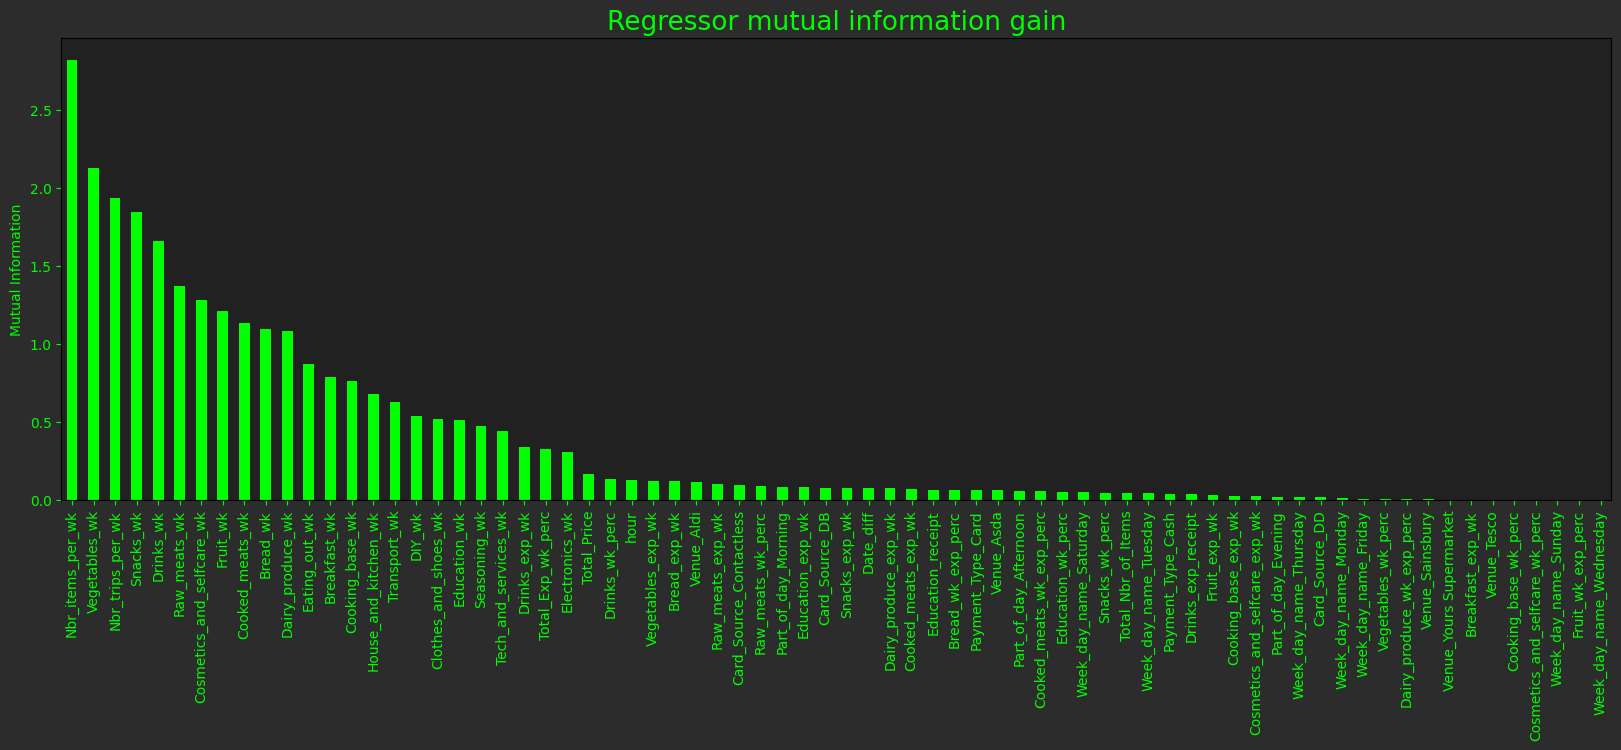

In [50]:
mutual_info = mutual_info_regression(X_train_scaled.drop(['target'], axis=1),
                                  X_train_scaled.target,
                                  random_state=43)

# and make a bar  plot
fig = plt.figure()
fig.patch.set_facecolor('#212121')
fig.patch.set_alpha(0.95)

ax = fig.add_subplot(111)
ax.patch.set_facecolor('#212121')
ax.patch.set_alpha(1.0)
ax.yaxis.label.set_color('lime')
ax.xaxis.label.set_color('lime')
ax.title.set_color('lime')
ax.tick_params(colors='lime', which='both')

mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_scaled.drop(['target'], axis=1).columns
mutual_info.sort_values(ascending=False).plot(ax=ax, kind='bar',figsize=(20,6), color='lime')
plt.xticks(rotation=90)
plt.ylabel('Mutual Information')
plt.title("Regressor mutual information gain", fontsize=19)

<p>
The plot above shows that features with the "_wk" postscript, weekly, are the most powerful.<br>
Note, the final feature selection will be done with the best model coming out of GridSearchCV, later.
</p>

<h1 style="color: green;">Export the scaled model data</h1>

In [51]:
X_train_scaled.to_csv("../2. Data/homeshopping_Regressor_X_train.csv",index=False)
X_test_scaled.to_csv("../2. Data/homeshopping_Regressor_X_test.csv",index=False)